In [11]:
# Import all the libraries needed 

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from pylab import *
from xclim.core.calendar import percentile_doy
from xclim.indices import tx10p


In [16]:
data = xr.open_dataset('/home/posiden/Documents/Datasets/era5/india.1960.1990.nc')


In [13]:
print(data)

<xarray.Dataset>
Dimensions:    (time: 10957, bnds: 2, longitude: 161, latitude: 141)
Coordinates:
  * time       (time) datetime64[ns] 1961-01-01T11:00:00 ... 1990-12-31T11:00:00
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 5.75 5.5 5.25 5.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Aug 10 10:42:11 2023: cdo sellonlatbox,60,100,5,40 land...
    frequency:    day
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...


### Climate Index Calculations 

In [14]:
from xclim.core.calendar import percentile_doy
from xclim.indices import tx10p

data = data.rename_vars({"t2m": "tasmax"})  # Renaming 't2m' to 'tasmax'

# Calculate the 10th percentile for each day of the year with a 5-day window
tasmax_per = percentile_doy(data['tasmax'], per=10, window=5).sel(percentiles=10)

# Calculate the tx10p index (number of days with tasmax below the 10th percentile)
cold_days = tx10p(data['tasmax'], tasmax_per)

# saving the file for easy visualisation
cold_days.to_netcdf('tx10p_index.nc')


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

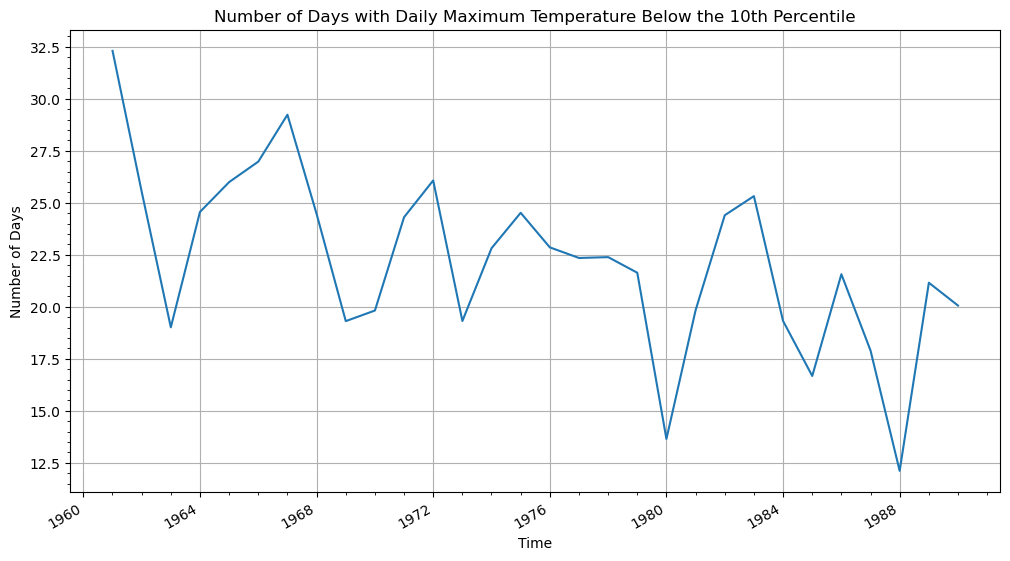

In [19]:
import matplotlib.pyplot as plt


cold_days_mean = cold_days.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Plotting the time series
plt.figure(figsize=(12, 6))
cold_days_mean.plot()
plt.title('Number of Days with Daily Maximum Temperature Below the 10th Percentile')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.grid(True)
plt.minorticks_on()
plt.show()


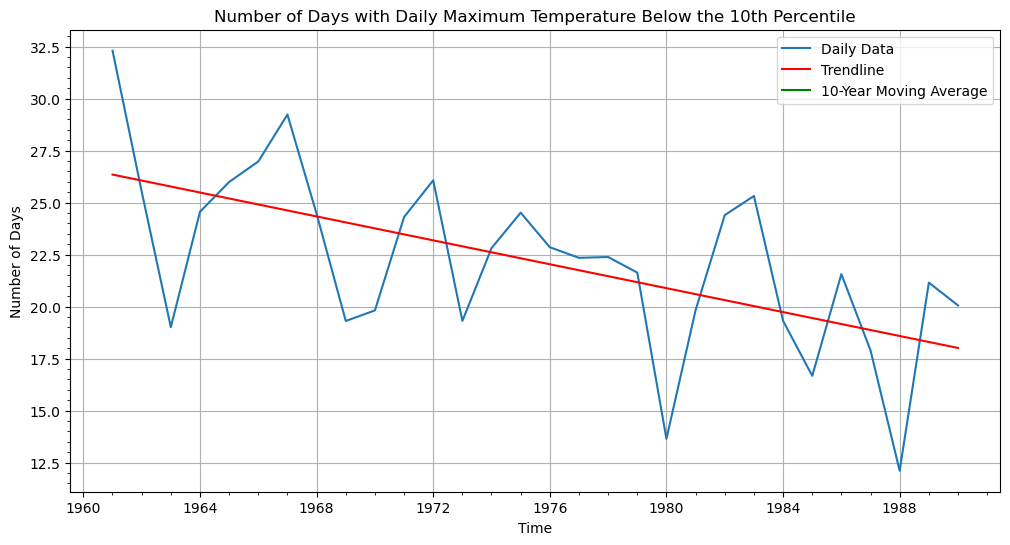

In [21]:
import numpy as np
import pandas as pd

cold_days_mean = cold_days.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Convert to a pandas Series for easier manipulation
cold_days_series = cold_days_mean.to_series()

# Calculate a linear trendline
slope, intercept = np.polyfit(cold_days_series.index.year, cold_days_series.values, 1)
trendline = slope * cold_days_series.index.year + intercept

# Calculate a 10-year moving average
moving_average = cold_days_series.rolling(window=10*365, center=True).mean()  

# Plotting the time series, trendline, and moving average
plt.figure(figsize=(12, 6))
plt.plot(cold_days_series.index, cold_days_series.values, label='Daily Data')
plt.plot(cold_days_series.index, trendline, label='Trendline', color='red')
plt.plot(moving_average.index, moving_average.values, label='10-Year Moving Average', color='green')
plt.title('Number of Days with Daily Maximum Temperature Below the 10th Percentile')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.legend()
plt.grid(True)
plt.minorticks_on()
plt.show()


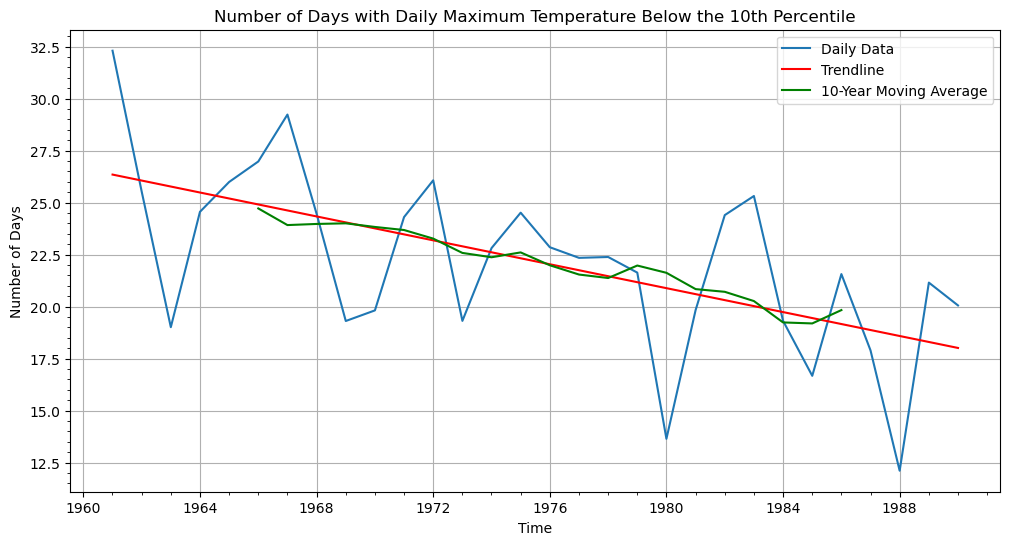

In [22]:
# Resample to annual data by taking the mean of each year
annual_data = cold_days_series.resample('AS').mean()

# Calculate a 10-year moving average of the annual data
moving_average = annual_data.rolling(window=10, center=True).mean()

# Plotting the time series, trendline, and moving average
plt.figure(figsize=(12, 6))
plt.plot(cold_days_series.index, cold_days_series.values, label='Daily Data')
plt.plot(cold_days_series.index, trendline, label='Trendline', color='red')
plt.plot(moving_average.index, moving_average.values, label='10-Year Moving Average', color='green')
plt.title('Number of Days with Daily Maximum Temperature Below the 10th Percentile')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.legend()
plt.grid(True)
plt.minorticks_on()
plt.show()


In [25]:
from xclim.core.calendar import percentile_doy
from xclim.indices import tx90p


tasmax_per_90 = percentile_doy(data['t2m'], per=90, window=5).sel(percentiles=90)
hot_days = tx90p(data['t2m'], tasmax_per_90)


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

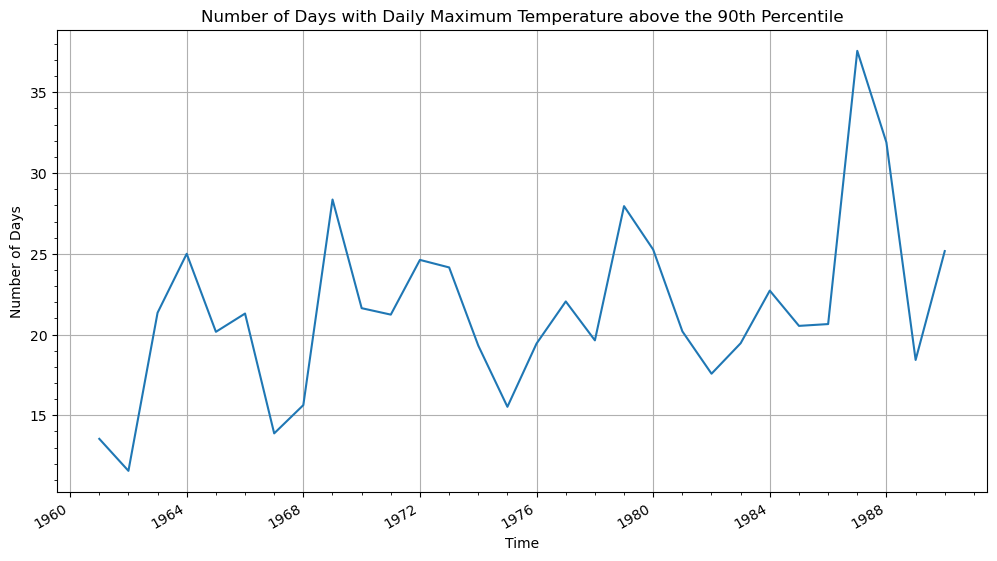

In [26]:
hot_days_mean = hot_days.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Plotting the time series
plt.figure(figsize=(12, 6))
hot_days_mean.plot()
plt.title('Number of Days with Daily Maximum Temperature above the 90th Percentile')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.grid(True)
plt.minorticks_on()
plt.show()


In [27]:
from xclim.indices import tn10p


tasmin_per_10 = percentile_doy(data['t2m'], per=10, window=5).sel(percentiles=10)
cold_nights = tn10p(data['t2m'], tasmin_per_10)


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

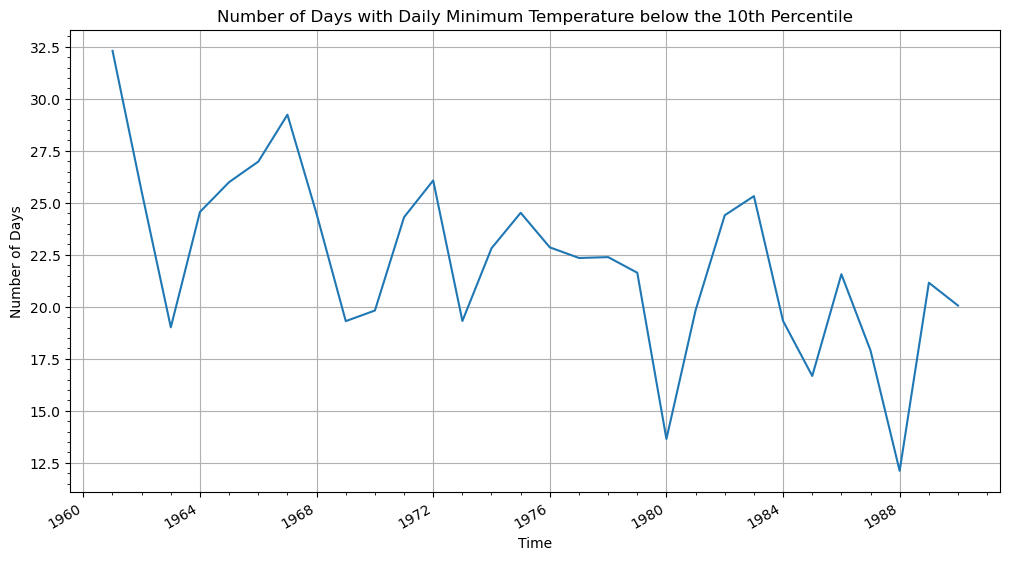

In [28]:
cold_nights_mean = cold_nights.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Plotting the time series
plt.figure(figsize=(12, 6))
cold_nights_mean.plot()
plt.title('Number of Days with Daily Minimum Temperature below the 10th Percentile')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.grid(True)
plt.minorticks_on()
plt.show()


In [29]:
from xclim.indices import tn90p


tasmin_per_90 = percentile_doy(data['t2m'], per=90, window=5).sel(percentiles=90)
warm_nights = tn90p(data['t2m'], tasmin_per_90)


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

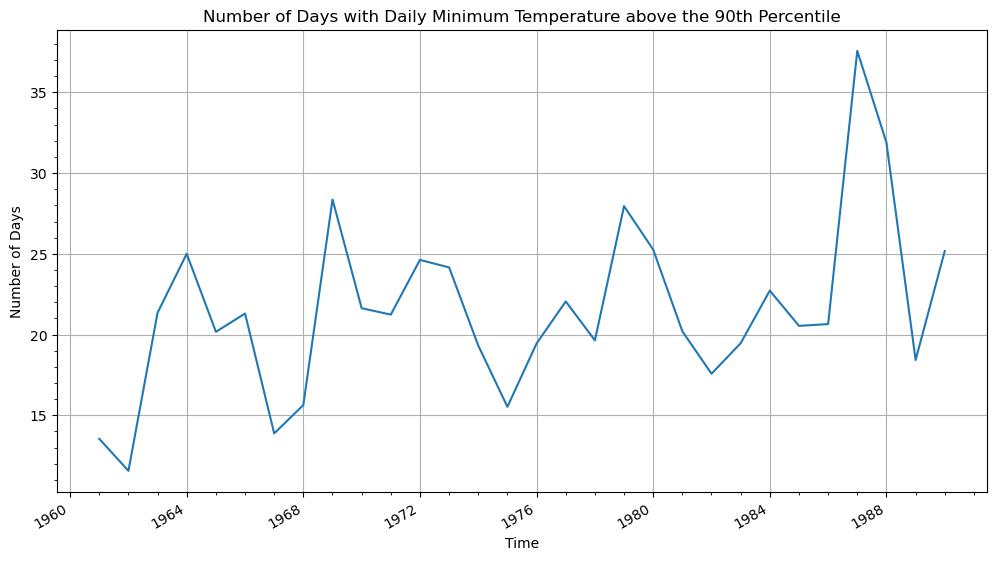

In [30]:
warm_nights_mean = warm_nights.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Plotting the time series
plt.figure(figsize=(12, 6))
warm_nights_mean.plot()
plt.title('Number of Days with Daily Minimum Temperature above the 90th Percentile')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.grid(True)
plt.minorticks_on()
plt.show()


In [31]:
from xclim.indices import warm_spell_duration_index


tasmax_per_90 = percentile_doy(data['t2m'], per=90, window=5).sel(percentiles=90)
warm_spell_index = warm_spell_duration_index(data['t2m'], tasmax_per_90)


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

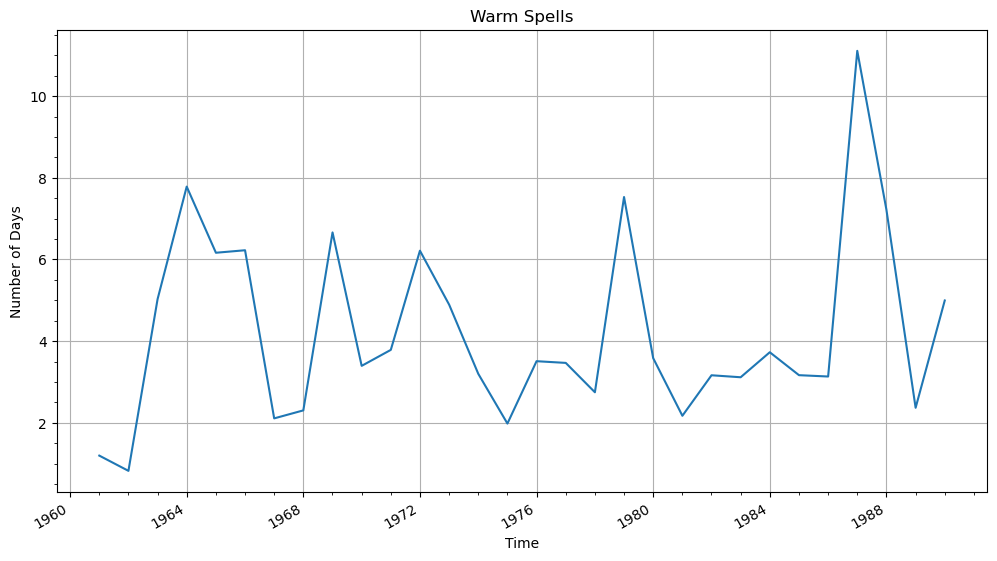

In [32]:
warm_spell_index_mean = warm_spell_index.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Plotting the time series
plt.figure(figsize=(12, 6))
warm_spell_index_mean.plot()
plt.title('Warm Spells')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.grid(True)
plt.minorticks_on()
plt.show()


In [33]:
from xclim.indices import cold_spell_duration_index


tasmin_per_10 = percentile_doy(data['t2m'], per=10, window=5).sel(percentiles=10)
cold_spell_index = cold_spell_duration_index(data['t2m'], tasmin_per_10)


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

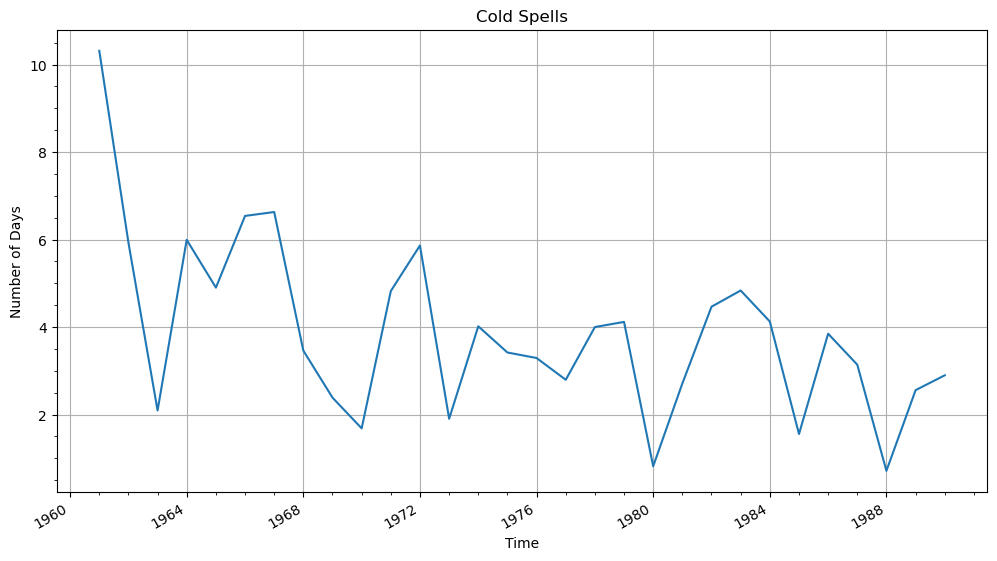

In [34]:
cold_spell_index_mean = cold_spell_index.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Plotting the time series
plt.figure(figsize=(12, 6))
cold_spell_index_mean.plot()
plt.title('Cold Spells')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.grid(True)
plt.minorticks_on()
plt.show()


In [35]:
from xclim.indices import frost_days


frost_days_index = frost_days(data['t2m'], thresh='273.15 K')


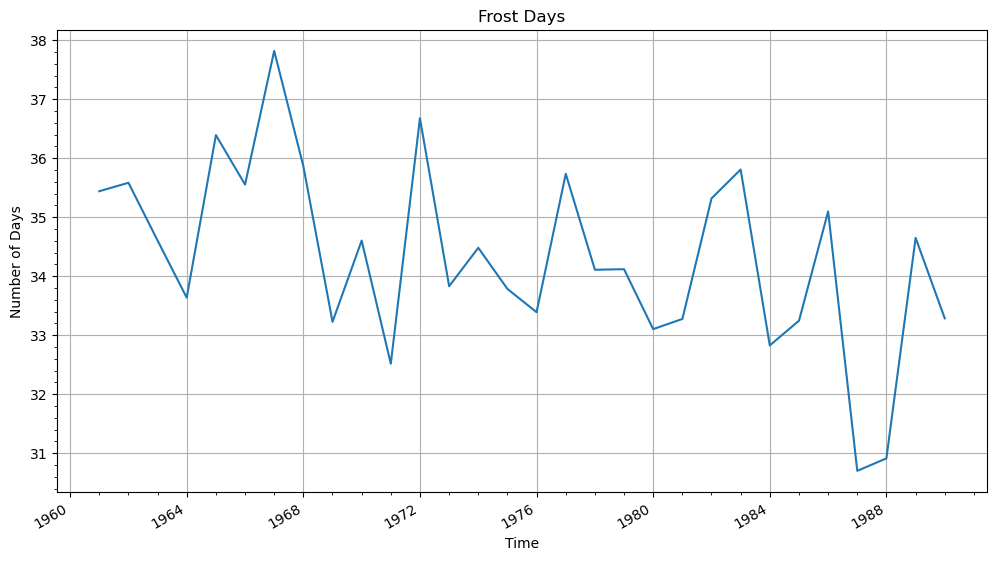

In [36]:
frost_days_index_mean = frost_days_index.mean(dim=['latitude', 'longitude'])  # Averaging over the spatial dimensions

# Plotting the time series
plt.figure(figsize=(12, 6))
frost_days_index_mean.plot()
plt.title('Frost Days')
plt.xlabel('Time')
plt.ylabel('Number of Days')
plt.grid(True)
plt.minorticks_on()
plt.show()


### Pre-Processing of the Data 

Lets try to write a function which will take care of all the pre-processing functions of the dataset input

In [61]:
def pre_process(datafile, time_range=None, fill_missing=None, resample_freq=None, months=None, season=None, resample_method='mean'):
    try:
        print("Loading data...")
        # 1. Loading Data
        data = xr.open_dataset(datafile)
        print("Data loaded successfully.")

        # Check if the time dimension exists
        if 'time' not in data.dims:
            raise ValueError("Time dimension not found in the dataset.")
        print("Time axis found.")

        # 2. Time Selection
        if time_range:
            print(f"Selecting data within time range: {time_range[0]} to {time_range[1]}...")
            start_time, end_time = time_range
            data = data.sel(time=slice(start_time, end_time))
            print("Time selection completed.")

        # 3. Select specific months
        if months:
            print(f"Selecting data for specific months: {months}...")
            data = data.sel(time=data['time.month'].isin(months))
            print("Month selection completed.")

        # 4. Select specific season
        if season:
            print(f"Selecting data for specific season: {season}...")
            data = data.sel(time=data['time.season'] == season)
            print("Season selection completed.")

        # 5. Resample or aggregate data
        if resample_freq:
            print(f"Resampling data with frequency: {resample_freq}, using method: {resample_method}...")
            resampler = data.resample(time=resample_freq)
            if resample_method in dir(resampler):
                data = getattr(resampler, resample_method)()
            else:
                raise ValueError(f"Unknown resampling method: {resample_method}.")
            print("Resampling completed.")
        
        # 6. Handling Missing Values (NaN)
        if fill_missing:
            if isinstance(fill_missing, (int, float)):
                print(f"Filling missing values with specified value: {fill_missing}...")
                data = data.fillna(fill_missing)
            elif fill_missing == 'interpolate':
                print("Filling missing values using interpolation...")
                data = data.interpolate_na(dim='time', method='linear')
            else:
                print(f"Unknown method to fill missing values: {fill_missing}. Skipping this step.")
            print("Missing values handling completed.")

        return data

    except Exception as e:
        print(f"An error occurred while processing the data: {str(e)}")
        return data  # Return the modified dataset up to the point of failure


In [62]:
filepath = '/home/posiden/Documents/Datasets/era5/india.1960.1990.nc'

test = pre_process(filepath)

Loading data...
Data loaded successfully.
Time axis found.


In [63]:
test

<xarray.Dataset>
Dimensions:    (time: 10957, bnds: 2, longitude: 161, latitude: 141)
Coordinates:
  * time       (time) datetime64[ns] 1961-01-01T11:00:00 ... 1990-12-31T11:00:00
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 99.5 99.75 100.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... 5.75 5.5 5.25 5.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Aug 10 10:42:11 2023: cdo sellonlatbox,60,100,5,40 land...
    frequency:    day
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [ ]:
import matplotlib.pyplot as plt

def plot_tx10p(data, title):
    # Take the mean along latitude and longitude
    data_mean = data.mean(dim=['latitude', 'longitude'])
    
    data_mean.plot(figsize=(10, 5))
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('tx10p Index')
    plt.grid(True)
    plt.show()

# Path to your data file
datafile = '/home/posiden/Documents/Datasets/era5/india.1960.1990.nc'

# Test for specific months (e.g., January, February, March)
processed_data_months = pre_process(datafile, months=[1, 2, 3])
tasmax_per_months = percentile_doy(processed_data_months['t2m'], per=10, window=5).sel(percentiles=10)
tx10p_months = tx10p(processed_data_months['t2m'], tasmax_per_months)
plot_tx10p(tx10p_months, "tx10p for Specific Months: January, February, March")

# Test for specific season (e.g., Summer: June, July, August)
processed_data_season = pre_process(datafile, season='JJA')
tasmax_per_season = percentile_doy(processed_data_season['t2m'], per=10, window=5).sel(percentiles=10)
tx10p_season = tx10p(processed_data_season['t2m'], tasmax_per_season)
plot_tx10p(tx10p_season, "tx10p for Specific Season: Summer (JJA)")


### Class Implementation 

Loading data...
Data loaded successfully.
Time axis found.


/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xclim/core/utils.py:461: RuntimeWarning: All-NaN slice encountered
  result = np.where(np.isnan(interpolation), np.nanmax(arr, axis=0), interpolation)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/python3.11/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/home/posiden/anaconda3/lib/

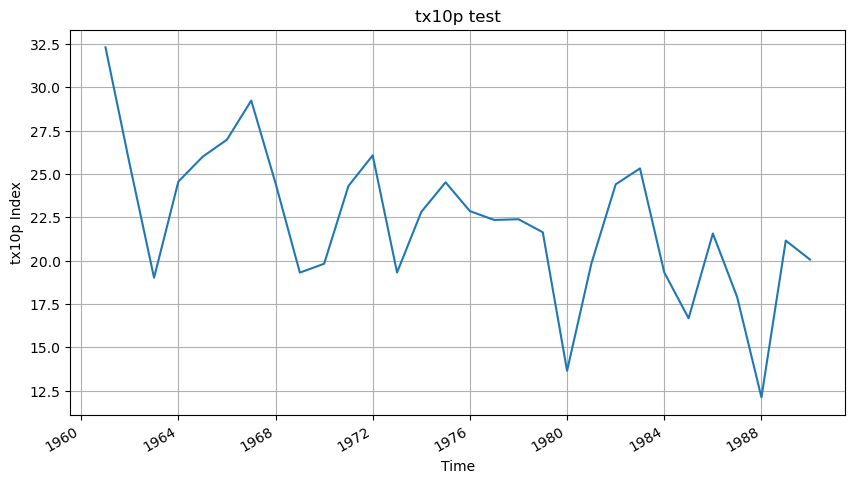

In [65]:
import xarray as xr
from xclim.indices import tx10p, tx90p, tn10p, tn90p, warm_spell_duration_index, cold_spell_duration_index, frost_days
from xclim.core.calendar import percentile_doy

class ClimateIndex:
    def __init__(self, datafile):
        self.datafile = datafile
        self.data = None

    def pre_process(self, time_range=None, fill_missing=None, resample_freq=None, months=None, season=None, resample_method='mean'):
        try:
            print("Loading data...")
            # 1. Loading Data
            self.data = xr.open_dataset(self.datafile)
            print("Data loaded successfully.")

            # Check if the time dimension exists
            if 'time' not in self.data.dims:
                raise ValueError("Time dimension not found in the dataset.")
            print("Time axis found.")

            # 2. Time Selection
            if time_range:
                print(f"Selecting data within time range: {time_range[0]} to {time_range[1]}...")
                start_time, end_time = time_range
                self.data = self.data.sel(time=slice(start_time, end_time))
                print("Time selection completed.")

            # 3. Select specific months
            if months:
                print(f"Selecting data for specific months: {months}...")
                self.data = self.data.sel(time=self.data['time.month'].isin(months))
                print("Month selection completed.")

            # 4. Select specific season
            if season:
                print(f"Selecting data for specific season: {season}...")
                self.data = self.data.sel(time=self.data['time.season'] == season)
                print("Season selection completed.")

            # 5. Resample or aggregate data
            if resample_freq:
                print(f"Resampling data with frequency: {resample_freq}, using method: {resample_method}...")
                resampler = self.data.resample(time=resample_freq)
                if resample_method in dir(resampler):
                    self.data = getattr(resampler, resample_method)()
                else:
                    raise ValueError(f"Unknown resampling method: {resample_method}.")
                print("Resampling completed.")
            
            # 6. Handling Missing Values (NaN)
            if fill_missing:
                if isinstance(fill_missing, (int, float)):
                    print(f"Filling missing values with specified value: {fill_missing}...")
                    data = data.fillna(fill_missing)
                elif fill_missing == 'interpolate':
                    print("Filling missing values using interpolation...")
                    data = data.interpolate_na(dim='time', method='linear')
                else:
                    print(f"Unknown method to fill missing values: {fill_missing}. Skipping this step.")
                print("Missing values handling completed.")

        except Exception as e:
            print(f"An error occurred while processing the data: {str(e)}")
            # Return the modified dataset up to the point of failure (already updated in self.data)

    def calculate_tx10p(self):
        tasmax_per = percentile_doy(self.data['t2m'], per=10, window=5).sel(percentiles=10)
        return tx10p(self.data['t2m'], tasmax_per)

    def calculate_tx90p(self):
        tasmax_per = percentile_doy(self.data['t2m'], per=90, window=5).sel(percentiles=90)
        return tx90p(self.data['t2m'], tasmax_per)

    def calculate_tn10p(self):
        tasmin_per = percentile_doy(self.data['t2m'], per=10, window=5).sel(percentiles=10)
        return tn10p(self.data['t2m'], tasmin_per)

    def calculate_tn90p(self):
        tasmin_per = percentile_doy(self.data['t2m'], per=90, window=5).sel(percentiles=90)
        return tn90p(self.data['t2m'], tasmin_per)

    def calculate_frost_days(self):
        return frost_days(self.data['t2m'], thresh='273.15 K')

    def calculate_warm_spell(self):
        tasmax_per = percentile_doy(self.data['t2m'], per=90, window=5).sel(percentiles=90)
        return warm_spell_duration_index(self.data['t2m'], tasmax_per)

    def calculate_cold_spell(self):
        tasmin_per = percentile_doy(self.data['t2m'], per=10, window=5).sel(percentiles=10)
        return cold_spell_duration_index(self.data['t2m'], tasmin_per)


# Example usage:
climate_index = ClimateIndex(datafile='/home/posiden/Documents/Datasets/era5/india.1960.1990.nc')
climate_index.pre_process()
tx10p_index = climate_index.calculate_tx10p()

def plot_tx10p(data, title):
    # Take the mean along latitude and longitude
    data_mean = data.mean(dim=['latitude', 'longitude'])
    
    data_mean.plot(figsize=(10, 5))
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('tx10p Index')
    plt.grid(True)
    plt.show()

plot_tx10p(tx10p_index, "tx10p test")